In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
import tensorflow as tf

In [3]:
mavenn.set_seed(0)
x_1 = np.random.randn(100)
y_1 = tf.random.normal(shape=(100,))

mavenn.set_seed(0)
x_2 = np.random.randn(100)
y_2 = tf.random.normal(shape=(100,))

print(f'numpy seed works: {all(x_1==x_2)}')
print(f'tensorflow seed works: {all(y_1==y_2)}')

numpy seed works: True
tensorflow seed works: True


In [4]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')

# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 24,411
testing N: 6,079


In [5]:
models = []
for i in range(2):

    # Set seeed
    mavenn.set_seed(0)
    
    # Define model
    model = mavenn.Model(regression_type='GE',
                         L=L,
                         alphabet='rna',
                         gpmap_type='mlp',
                         gpmap_kwargs={
                             'hidden_layer_sizes':[5]*5,
                             'features':'pairwise'
                         },
                         ge_noise_model_type='SkewedT',
                         ge_heteroskedasticity_order=2)
    
    # Set training data
    model.set_data(x=train_df['x'],
                   y=train_df['y'])

    # Fit model to data
    model.fit(learning_rate=.005,
              epochs=10,
              batch_size=100,
              early_stopping=True,
              early_stopping_patience=30,
              linear_initialization=False)
    
    models.append(model)

N = 24,411 observations set as training data.
Data shuffled.
Time to set data: 0.376 sec.
Epoch 1/10
196/196 [==============================] - 1s 5ms/step - loss: 104.9466 - I_var: -0.0772 - val_loss: 91.2193 - val_I_var: 0.1051
Epoch 2/10
196/196 [==============================] - 1s 3ms/step - loss: 85.2321 - I_var: 0.1960 - val_loss: 81.4971 - val_I_var: 0.2493
Epoch 3/10
196/196 [==============================] - 1s 3ms/step - loss: 80.9738 - I_var: 0.2629 - val_loss: 79.7700 - val_I_var: 0.2789
Epoch 4/10
196/196 [==============================] - 1s 3ms/step - loss: 78.6190 - I_var: 0.2986 - val_loss: 96.0539 - val_I_var: 0.0485
Epoch 5/10
196/196 [==============================] - 1s 3ms/step - loss: 77.9294 - I_var: 0.3110 - val_loss: 76.9510 - val_I_var: 0.3251
Epoch 6/10
196/196 [==============================] - 1s 3ms/step - loss: 76.2458 - I_var: 0.3393 - val_loss: 75.7305 - val_I_var: 0.3445
Epoch 7/10
196/196 [==============================] - 1s 3ms/step - loss: 76.251

In [6]:
# Test that model predictions match
phi_0 = models[0].x_to_phi(train_df['x'])
phi_1 = models[1].x_to_phi(train_df['x'])

print(f'Models match: {all(phi_0 == phi_1)}')

Models match: False


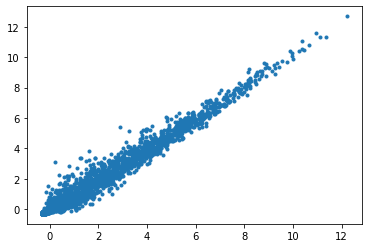

In [7]:
plt.plot(phi_0, phi_1, '.')